## Required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

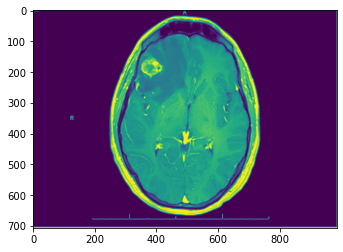

In [35]:
img=io.imread("C:/Users/DELL/Downloads/Brain_tumor/image.png",as_gray=True)
plt.imshow(img)

In [6]:
img.shape

(707, 986, 4)

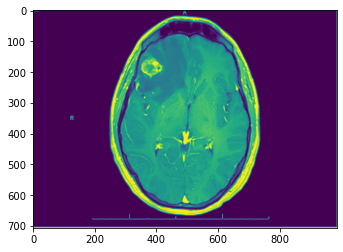

In [8]:
image=io.imread("C:/Users/DELL/Downloads/Brain_tumor/image.png",as_gray=True)
plt.imshow(image)

In [11]:
image.shape

(707, 986)

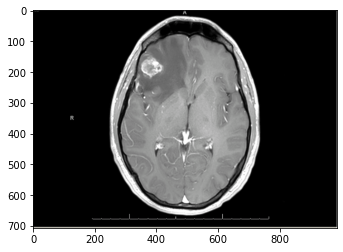

In [12]:
plt.imshow(img,cmap='gray')

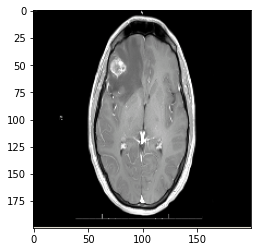

In [16]:
img1=cv2.resize(img, (200,200))
plt.imshow(img1,cmap='gray')

# Image enhancement

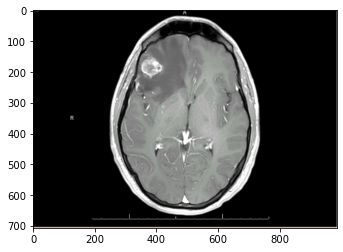

In [17]:
from PIL import Image, ImageEnhance
  
# Opening Image
im = Image.open(r"C:/Users/DELL/Downloads/Brain_tumor/image.png")
  
# Creating object of Color class
im3 = ImageEnhance.Color(im)
  
# showing resultant image
im4=im3.enhance(5.0)
plt.imshow(im4)

# Filtering

In [36]:
img2=np.uint8(img*255)

In [37]:
import random
import cv2
  
def add_noise(im,percentage):
    row,col,*_ = im.shape
    number_of_pixels = int(percentage*row*col/100)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        im[y_coord][x_coord] = 255

    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        im[y_coord][x_coord] = 0
    return im

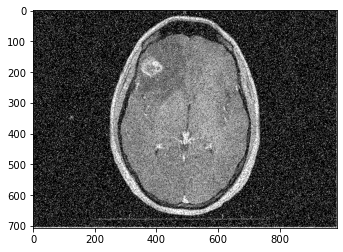

In [41]:
spn = add_noise(img2,10)

plt.imshow(spn,cmap='gray')

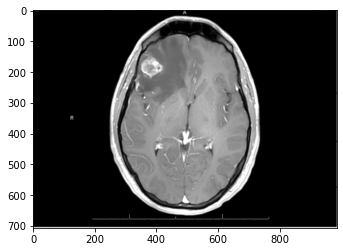

In [39]:
pi_median = cv2.medianBlur(spn,3)
plt.imshow(pi_median,cmap='gray')

# Threshould

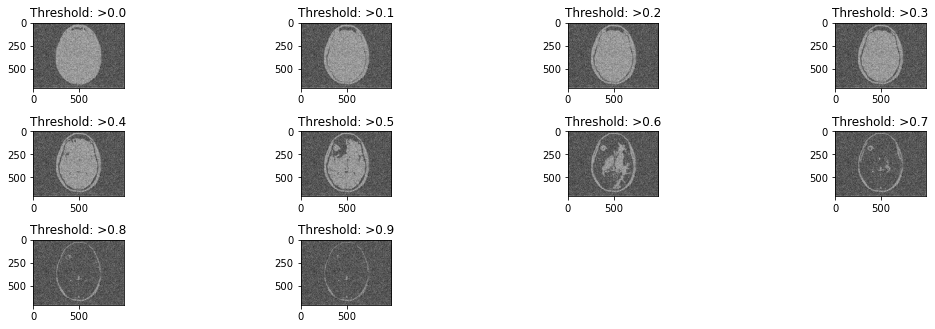

In [50]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format
#from skimage import data
 
# Sample Image of scikit-image package
#img = data.coffee()
#image = rgb2gray(coffee)
 
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
 
for i in range(10):
   
  # Iterating different thresholds
  binarized_gray = (image > i*0.1)*1
  plt.subplot(10,4,i+1)
   
  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*0.1,1)))
   
  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap = 'gray')
   
plt.tight_layout()

# segmentation

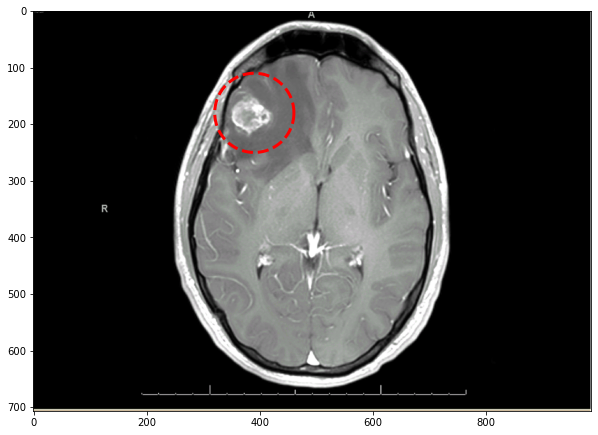

In [81]:

from skimage.segmentation import active_contour
 
# Localising the circle's center at 220, 110
x1 = 390 + 70*np.cos(np.linspace(0, 2*np.pi, 500))
x2 = 180 + 70*np.sin(np.linspace(0, 2*np.pi, 500))
 
# Generating a circle based on x1, x2
tumor = np.array([x1, x2]).T
 
# Computing the Active Contour for the given image
tumor_brain = active_contour(im4,
                                 tumor)
 
fig = plt.figure(figsize=(10, 10))
 
# Adding subplots to display the markers
ax = fig.add_subplot(111)
 
# Plotting sample image
ax.imshow(im4)
 
# Plotting the circle around tumor
ax.plot(tumor[:, 0],tumor[:, 1], '--r', lw=3)